<h3> Entrega trabajo 1 </h3>

<h4> Se aplica una <b>regresión</b> para predecir el precio del metro cuadrado a partir de numerosas variables en un dataset de gran heterogeneidad: datos de ciudades pertenecientes a muchos países con muchas variables medidas. Se aborda el problema del overfitting del modelo mediante dos técnicas: <i>Cross-Validation</i> y <i>Regularización Ridge</i>. </h4><h4>

Para comenzar, cargamos los paquetes que vamos a usar:

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [71]:
df = pd.read_csv("cost-of-living_v2.csv")
df.head()

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1


In [72]:
data = df.copy() #hago copia del df porque voy a modificarlo
data.shape

(4956, 58)

In [73]:
# vars_df = pd.read_csv("variables_explained_x1.csv", sep=",")
# vars_df.head()

#### Agrupamos las variables de acuerdo a la categoría a la que pertenecen

In [74]:
data['Restaurants_meal_prices']=data.loc[:,'x1':'x3'].mean(axis=1)
data['Restaurants_beer_prices']=data.loc[:,'x4':'x5'].mean(axis=1)
data['Restaurants_drinks_prices']=data.loc[:,'x6':'x8'].mean(axis=1)
data['Groceries']=data.loc[:,'x9':'x15'].mean(axis=1)
data['Vegetables']=data.loc[:,'x16':'x22'].mean(axis=1)
data['Supermarket_drinks_prices']=data.loc[:,'x23':'x27'].mean(axis=1)
data['Transportation']=data.loc[:,'x28':'x32'].mean(axis=1)
data['Gasoline']=data['x33']
data['Car_prices']=data.loc[:,'x34':'x35'].mean(axis=1)
data['Services']=data.loc[:,'x36':'x38'].mean(axis=1)
data['Entertainment']=data.loc[:,'x39':'x41'].mean(axis=1)
data['Education']=data.loc[:,'x42':'x43'].mean(axis=1)
data['Clothes']=data.loc[:,'x44':'x47'].mean(axis=1)
data['Price_per_Square_Meter']=data['x52']
data['Average_salary']=data['x54']
data['Mortgage']=data['x55']

In [75]:
data.drop(data.columns[2:57],axis=1,inplace=True)
data.head()

,city,country,data_quality,Restaurants_meal_prices,Restaurants_beer_prices,Restaurants_drinks_prices,Groceries,Vegetables,Supermarket_drinks_prices,Transportation,Gasoline,Car_prices,Services,Entertainment,Education,Clothes,Price_per_Square_Meter,Average_salary,Mortgage
0,Seoul,South Korea,1,22.536667,4.030,2.066667,10.907143,4.625714,4.870,11.262,1.43,28516.550,68.256667,27.936667,9153.350,71.4475,22067.70,2689.62,3.47
1,Shanghai,China,1,17.080000,2.705,1.613333,6.445714,1.470000,4.270,8.030,1.20,20340.315,27.700000,28.993333,13881.035,79.2825,17746.11,1419.87,5.03
2,Guangzhou,China,1,12.526667,1.280,1.436667,4.400000,1.260000,3.762,7.434,1.19,21367.465,25.443333,20.563333,12555.695,51.9700,12892.82,1211.68,5.19
3,Mumbai,India,1,8.593333,3.380,1.050000,2.650000,0.888571,4.072,1.402,1.35,17536.120,17.636667,13.686667,1894.870,37.8900,6092.45,640.81,7.96
4,Delhi,India,1,10.440000,2.760,0.816667,2.425714,0.808571,3.704,2.844,1.24,17611.205,22.010000,11.570000,1019.120,38.0125,2506.73,586.46,8.06


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   city                       4956 non-null   object 
 1   country                    4956 non-null   object 
 2   data_quality               4956 non-null   int64  
 3   Restaurants_meal_prices    4731 non-null   float64
 4   Restaurants_beer_prices    4597 non-null   float64
 5   Restaurants_drinks_prices  4714 non-null   float64
 6   Groceries                  4792 non-null   float64
 7   Vegetables                 4733 non-null   float64
 8   Supermarket_drinks_prices  4742 non-null   float64
 9   Transportation             4471 non-null   float64
 10  Gasoline                   4368 non-null   float64
 11  Car_prices                 4051 non-null   float64
 12  Services                   4682 non-null   float64
 13  Entertainment              4596 non-null   float

In [77]:
round(data.isna().sum().sort_values(ascending = False)/data.shape[0]*100,2) #porcentaje de Datos nulos por variable

Price_per_Square_Meter       44.94
Average_salary               28.89
Mortgage                     20.30
Education                    19.31
Car_prices                   18.26
Gasoline                     11.86
Transportation                9.79
Clothes                       7.79
Entertainment                 7.26
Restaurants_beer_prices       7.24
Services                      5.53
Restaurants_drinks_prices     4.88
Restaurants_meal_prices       4.54
Vegetables                    4.50
Supermarket_drinks_prices     4.32
Groceries                     3.31
country                       0.00
data_quality                  0.00
city                          0.00
dtype: float64

Eliminamos las filas (rows) en las que hay valores faltantes (NaN) en la columna 'Price_per_Square_Meter'

In [78]:
data = data.dropna(axis = 0, subset= 'Price_per_Square_Meter')
data.shape

(2729, 19)

Podemos ver la distribución de países:

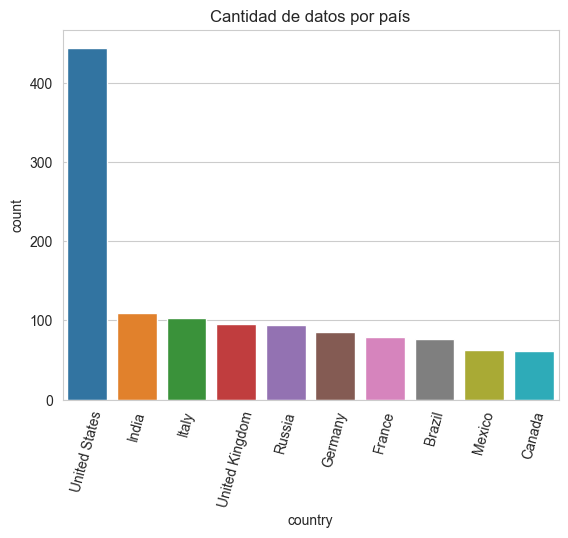

In [79]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='country', data=data, order=data.country.value_counts().index[0:10],orient='v')

plt.xticks(rotation=75)
plt.title("Cantidad de datos por país")
plt.show()

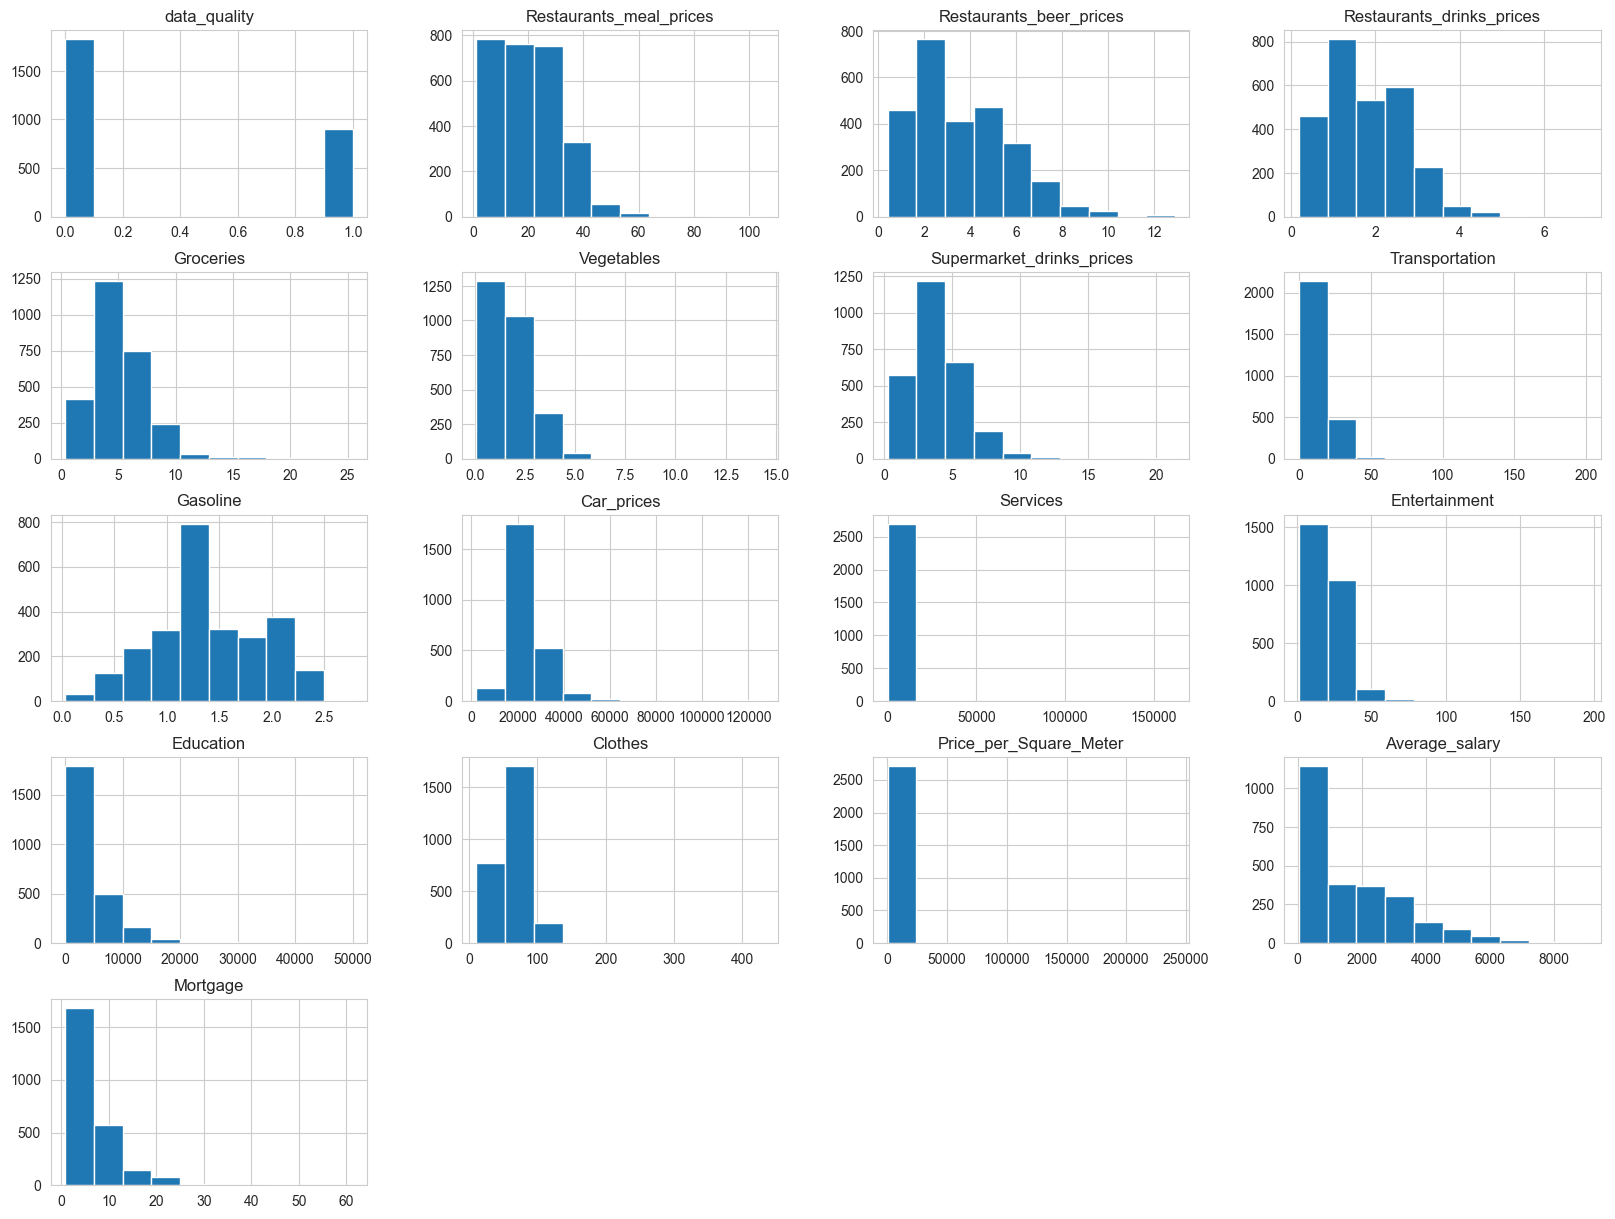

In [80]:
data.hist(figsize=(20, 15))
plt.show() #distribution of variables

In [81]:
#función para contar cant. de outliers basado en el rango interquartil donde se distribuyen los datos
def df_filtrado_outliers(df,columna):
    #calcula los outliers de la columna especificada
    Q1 = df[columna].quantile(q=0.25)
    Q3 = df[columna].quantile(q=0.75)
    IQR = Q3-Q1
    maxim = Q3 + 1.5*IQR
    minim = Q1 - 1.5*IQR
    #aplicamos el filtro
    #mask = (df[columna]<maximo) & (df[columna]>minimo)
    df2 = df.copy().loc[(df[columna] > float(maxim)) | (df[columna] < float(minim)), :][columna].count()
    return df2

In [82]:
for col in data.columns[2:]:
    print(df_filtrado_outliers(data,col), col)

0 data_quality
18 Restaurants_meal_prices
15 Restaurants_beer_prices
10 Restaurants_drinks_prices
46 Groceries
67 Vegetables
33 Supermarket_drinks_prices
43 Transportation
0 Gasoline
137 Car_prices
48 Services
79 Entertainment
126 Education
52 Clothes
172 Price_per_Square_Meter
54 Average_salary
141 Mortgage


In [83]:
def df_remove_outliers(df,columna):
    #calcula los outliers de la columna especificada
    Q1 = df[columna].quantile(q=0.25)
    Q3 = df[columna].quantile(q=0.75)
    IQR = Q3-Q1
    maxim = Q3 + 1.5*IQR
    minim = Q1 - 1.5*IQR
    #aplicamos el filtro
    #mask = (df[columna]<maximo) & (df[columna]>minimo)
    df2 = df.copy().loc[(df[columna] < float(maxim)) & (df[columna] > float(minim)), :]
    return df2

In [84]:
data_filtrada = data.copy()

In [85]:
for col in data.columns[2:]:
    data_filtrada= df_remove_outliers(data_filtrada,col)

In [86]:
data_filtrada.head()

,city,country,data_quality,Restaurants_meal_prices,Restaurants_beer_prices,Restaurants_drinks_prices,Groceries,Vegetables,Supermarket_drinks_prices,Transportation,Gasoline,Car_prices,Services,Entertainment,Education,Clothes,Price_per_Square_Meter,Average_salary,Mortgage
3,Mumbai,India,1,8.593333,3.380,1.050000,2.650000,0.888571,4.072,1.402,1.35,17536.120,17.636667,13.686667,1894.870,37.8900,6092.45,640.81,7.96
4,Delhi,India,1,10.440000,2.760,0.816667,2.425714,0.808571,3.704,2.844,1.24,17611.205,22.010000,11.570000,1019.120,38.0125,2506.73,586.46,8.06
5,Dhaka,Bangladesh,1,6.180000,5.485,0.800000,2.997143,1.105714,3.490,4.648,1.10,34012.130,19.656667,12.096667,795.520,34.7050,1119.98,280.73,9.26
7,Jakarta,Indonesia,1,9.616667,2.650,1.036667,3.421429,1.802857,6.162,3.044,0.81,27049.225,38.526667,15.303333,4902.970,54.2250,2632.80,509.12,9.05
11,Karachi,Pakistan,1,5.740000,2.400,0.630000,2.174286,0.615714,1.348,2.804,1.05,16419.255,29.096667,9.013333,617.485,24.5975,760.64,166.86,14.90


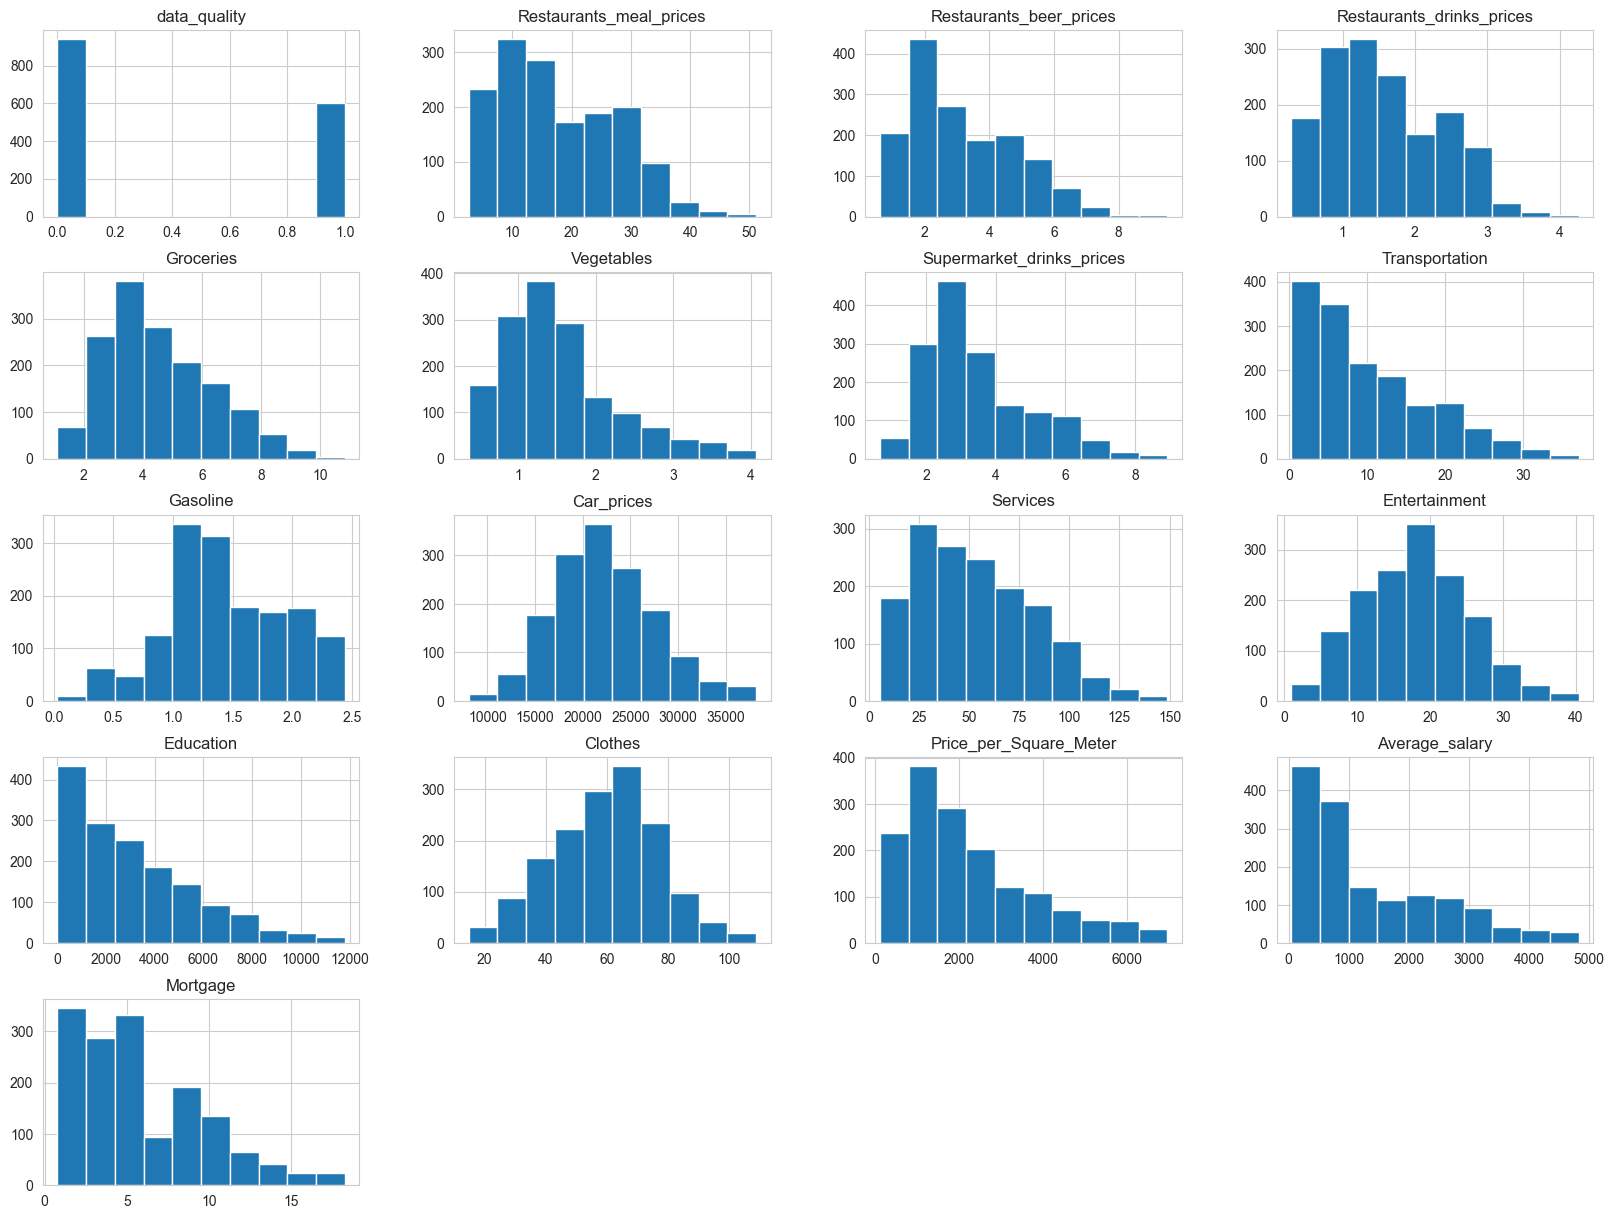

In [87]:
data_filtrada.hist(figsize=(20, 15))
plt.show()

In [88]:
#Vemos que los datos ya no tienen outliers y las distribuciones se ven mejor

Examinamos también la correlación entre las variables:

<Axes: >

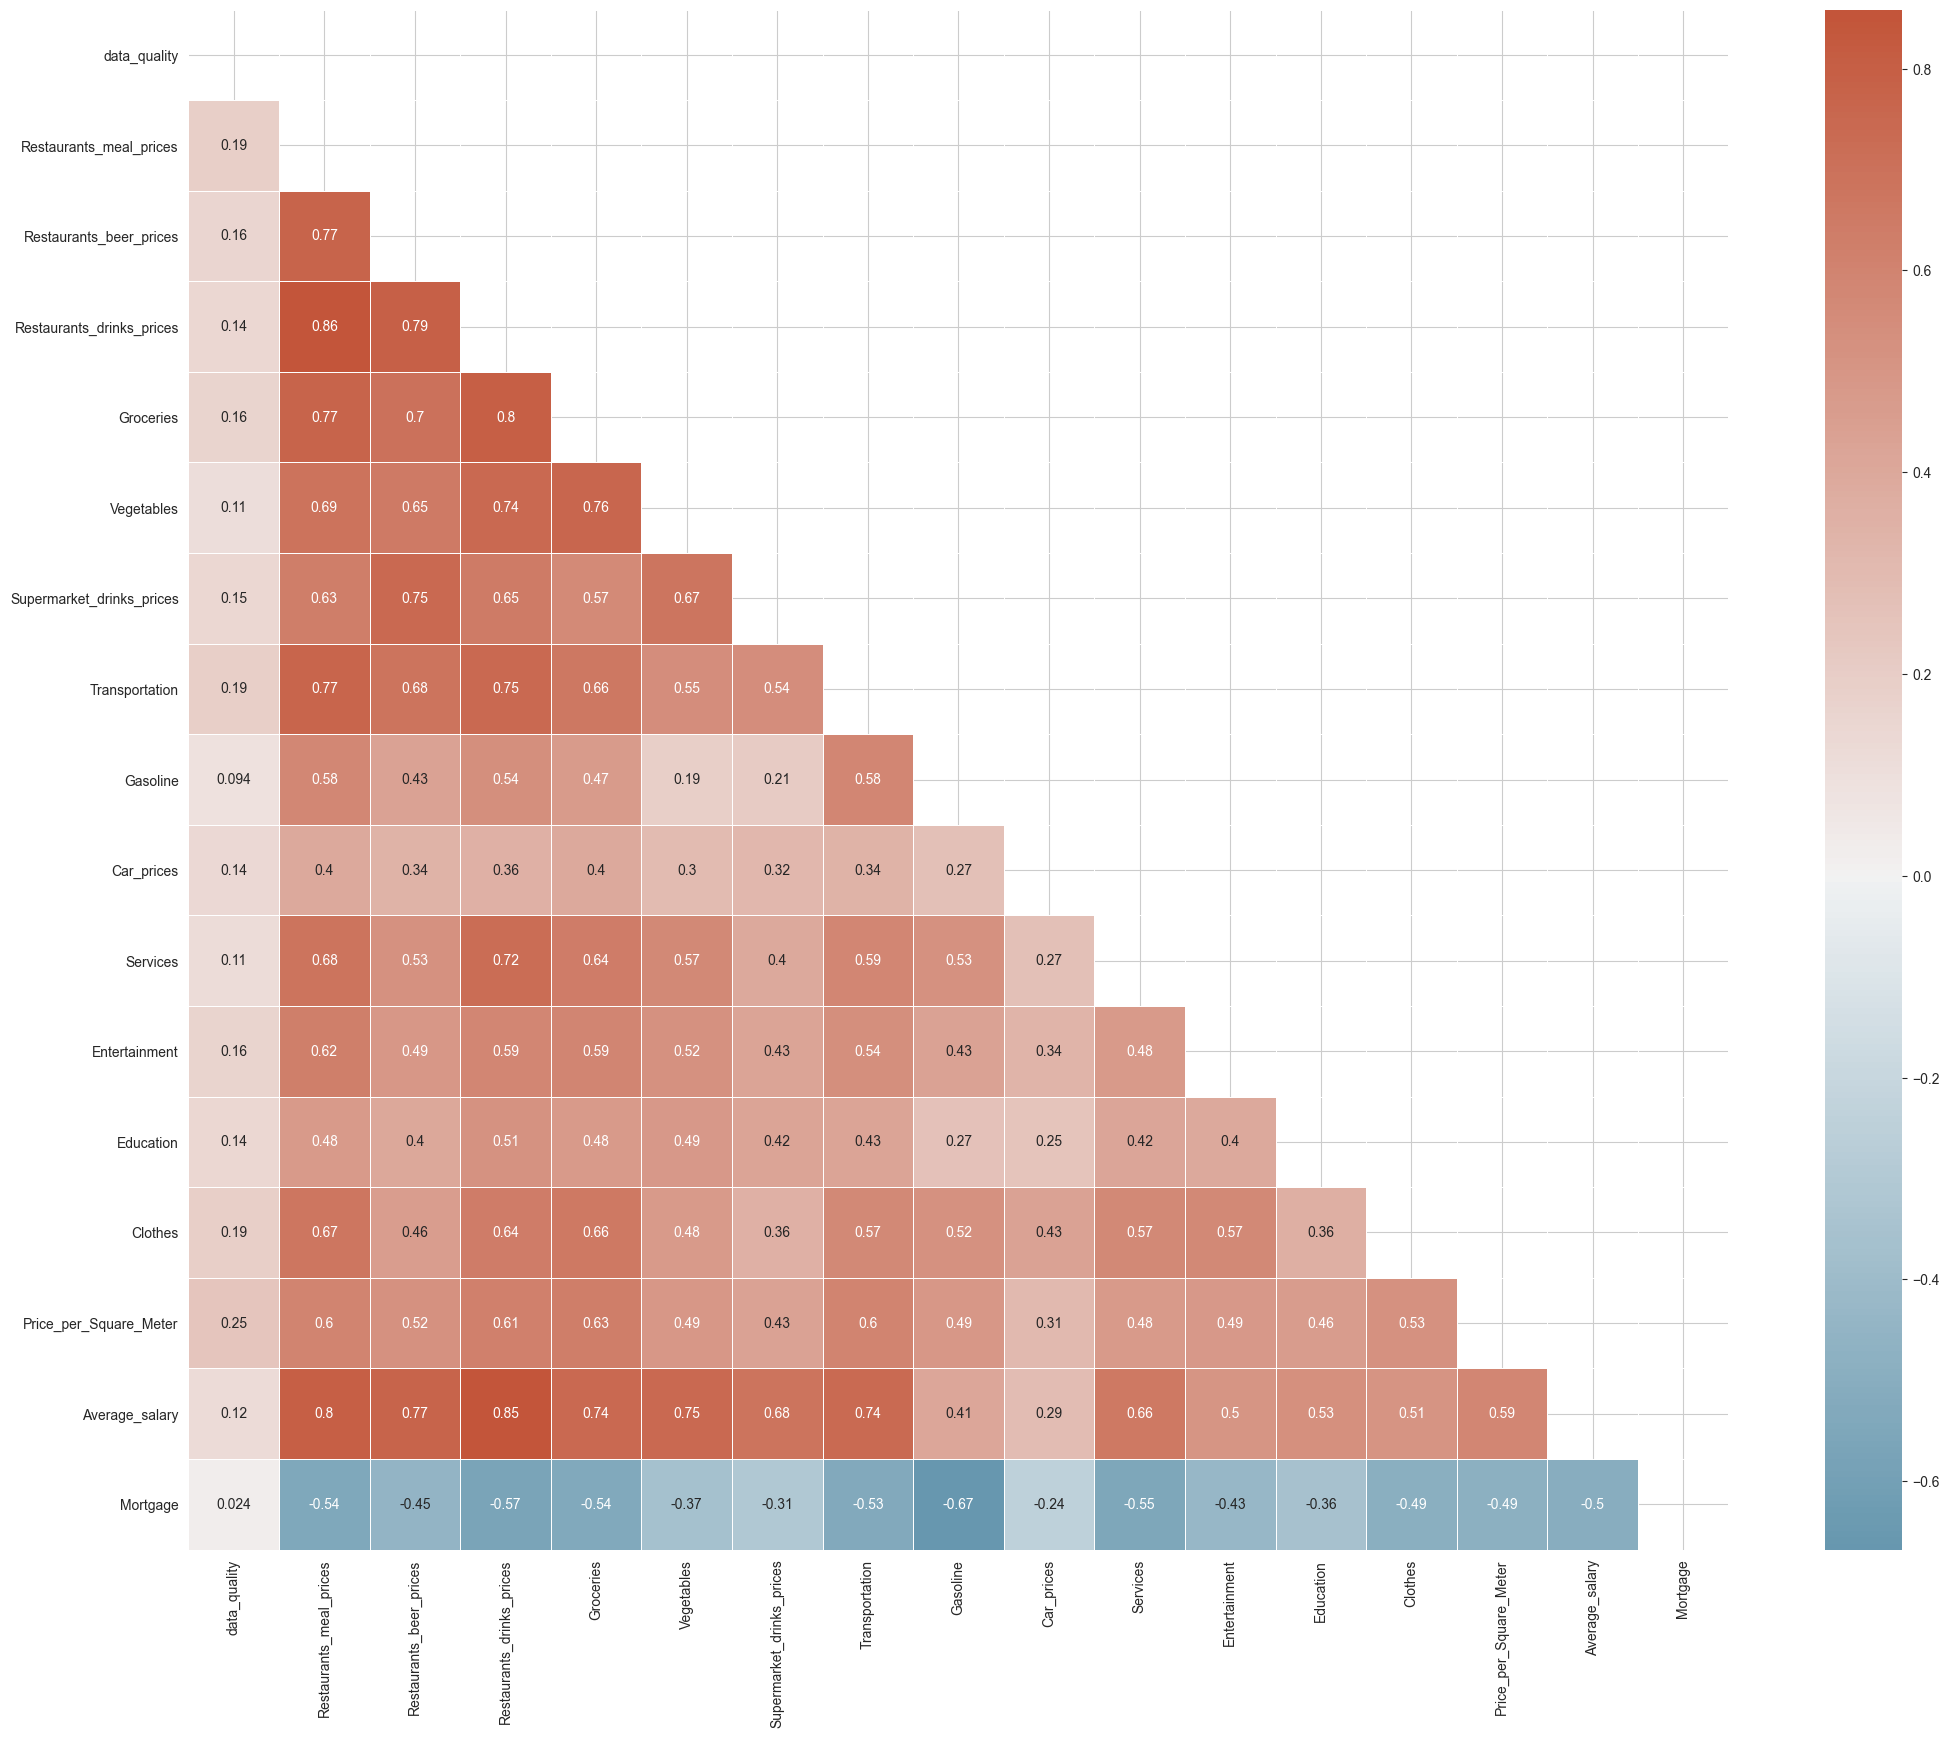

In [89]:
df_corr = data_filtrada.iloc[:,2:].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5,annot=True)

In [90]:
mean_by_country = data_filtrada.groupby('country').mean()
mean_by_country.head()

C:\Users\merlo\AppData\Local\Temp\ipykernel_19024\3861495147.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_country = data_filtrada.groupby('country').mean()


,data_quality,Restaurants_meal_prices,Restaurants_beer_prices,Restaurants_drinks_prices,Groceries,Vegetables,Supermarket_drinks_prices,Transportation,Gasoline,Car_prices,Services,Entertainment,Education,Clothes,Price_per_Square_Meter,Average_salary,Mortgage
country,,,,,,,,,,,,,,,,,
Afghanistan,0.000000,3.573333,2.260000,0.356667,1.821429,0.551667,1.206667,2.982000,0.680000,26440.680000,56.510000,4.895000,16.950000,33.897500,480.780000,152.540000,10.300000
Albania,0.428571,11.452857,1.675714,0.962381,3.401020,0.905918,2.309143,4.783048,1.811429,18140.737857,33.031905,14.600000,1254.652857,53.349286,1015.094286,390.120000,4.818571
Algeria,0.181818,6.646061,1.618636,0.427879,3.445714,1.140130,2.536364,2.592773,0.285455,23064.596364,24.760909,8.931364,732.239091,44.486818,905.630000,246.238182,5.786364
Andorra,0.000000,25.116667,2.635000,1.703333,6.668571,1.765714,3.346000,8.578000,1.390000,18967.410000,38.983333,21.600000,4596.085000,75.297500,4425.730000,2509.670000,2.500000
Armenia,0.500000,15.055000,1.610000,1.110000,3.847857,1.168571,2.427000,2.125250,1.215000,25859.465000,37.220000,21.456667,3539.897500,73.911250,1385.930000,417.365000,12.200000


In [91]:
data_filtrada_2 = data_filtrada.copy()

In [92]:
for col,i in zip(mean_by_country.columns, mean_by_country.index):
    data_filtrada[data_filtrada['country']==i][col].fillna(mean_by_country.loc[i,col],inplace=True)

C:\Users\merlo\AppData\Local\Temp\ipykernel_19024\838620263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada[data_filtrada['country']==i][col].fillna(mean_by_country.loc[i,col],inplace=True)


In [93]:
data_filtrada.head()

,city,country,data_quality,Restaurants_meal_prices,Restaurants_beer_prices,Restaurants_drinks_prices,Groceries,Vegetables,Supermarket_drinks_prices,Transportation,Gasoline,Car_prices,Services,Entertainment,Education,Clothes,Price_per_Square_Meter,Average_salary,Mortgage
3,Mumbai,India,1,8.593333,3.380,1.050000,2.650000,0.888571,4.072,1.402,1.35,17536.120,17.636667,13.686667,1894.870,37.8900,6092.45,640.81,7.96
4,Delhi,India,1,10.440000,2.760,0.816667,2.425714,0.808571,3.704,2.844,1.24,17611.205,22.010000,11.570000,1019.120,38.0125,2506.73,586.46,8.06
5,Dhaka,Bangladesh,1,6.180000,5.485,0.800000,2.997143,1.105714,3.490,4.648,1.10,34012.130,19.656667,12.096667,795.520,34.7050,1119.98,280.73,9.26
7,Jakarta,Indonesia,1,9.616667,2.650,1.036667,3.421429,1.802857,6.162,3.044,0.81,27049.225,38.526667,15.303333,4902.970,54.2250,2632.80,509.12,9.05
11,Karachi,Pakistan,1,5.740000,2.400,0.630000,2.174286,0.615714,1.348,2.804,1.05,16419.255,29.096667,9.013333,617.485,24.5975,760.64,166.86,14.90


<Axes: xlabel='Price_per_Square_Meter', ylabel='Count'>

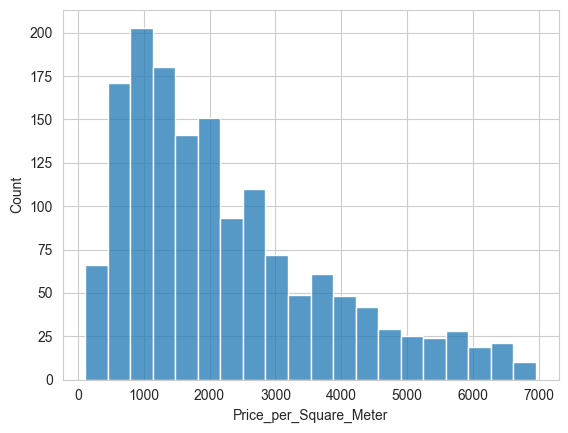

In [94]:
sns.histplot(data=data_filtrada, x="Price_per_Square_Meter")

In [95]:
data_filtrada.set_index('city',inplace=True)
data_filtrada.head(3)

,country,data_quality,Restaurants_meal_prices,Restaurants_beer_prices,Restaurants_drinks_prices,Groceries,Vegetables,Supermarket_drinks_prices,Transportation,Gasoline,Car_prices,Services,Entertainment,Education,Clothes,Price_per_Square_Meter,Average_salary,Mortgage
city,,,,,,,,,,,,,,,,,,
Mumbai,India,1,8.593333,3.380,1.050000,2.650000,0.888571,4.072,1.402,1.35,17536.120,17.636667,13.686667,1894.87,37.8900,6092.45,640.81,7.96
Delhi,India,1,10.440000,2.760,0.816667,2.425714,0.808571,3.704,2.844,1.24,17611.205,22.010000,11.570000,1019.12,38.0125,2506.73,586.46,8.06
Dhaka,Bangladesh,1,6.180000,5.485,0.800000,2.997143,1.105714,3.490,4.648,1.10,34012.130,19.656667,12.096667,795.52,34.7050,1119.98,280.73,9.26


In [96]:
data_filtrada.describe().iloc[[3,7],:]

,data_quality,Restaurants_meal_prices,Restaurants_beer_prices,Restaurants_drinks_prices,Groceries,Vegetables,Supermarket_drinks_prices,Transportation,Gasoline,Car_prices,Services,Entertainment,Education,Clothes,Price_per_Square_Meter,Average_salary,Mortgage
min,0.0,2.61,0.610,0.286667,1.115000,0.357143,0.672,0.2525,0.03,8032.125,5.426667,0.97,14.74,14.750,111.01,41.25,0.78
max,1.0,51.14,9.505,4.263333,10.831429,4.072857,8.932,37.0700,2.44,38167.380,148.920000,40.39,11803.59,108.945,6953.22,4825.00,18.25


<h3><b>Ajustamos distintos modelos para predecir el precio/m2 (Price per Square Meter)</h3></b>

<h4> 1°- Regresión </h4>

**Transfromo la variable 'country' a numérica mediante OneHotEncoder:**

In [97]:
from sklearn import preprocessing
#le = preprocessing.LabelEncoder() #creo el objeto
#data_filtrada['country_encoded'] = le.fit_transform(data_filtrada.country)

data_filtrada.head()

,country,data_quality,Restaurants_meal_prices,Restaurants_beer_prices,Restaurants_drinks_prices,Groceries,Vegetables,Supermarket_drinks_prices,Transportation,Gasoline,Car_prices,Services,Entertainment,Education,Clothes,Price_per_Square_Meter,Average_salary,Mortgage
city,,,,,,,,,,,,,,,,,,
Mumbai,India,1,8.593333,3.380,1.050000,2.650000,0.888571,4.072,1.402,1.35,17536.120,17.636667,13.686667,1894.870,37.8900,6092.45,640.81,7.96
Delhi,India,1,10.440000,2.760,0.816667,2.425714,0.808571,3.704,2.844,1.24,17611.205,22.010000,11.570000,1019.120,38.0125,2506.73,586.46,8.06
Dhaka,Bangladesh,1,6.180000,5.485,0.800000,2.997143,1.105714,3.490,4.648,1.10,34012.130,19.656667,12.096667,795.520,34.7050,1119.98,280.73,9.26
Jakarta,Indonesia,1,9.616667,2.650,1.036667,3.421429,1.802857,6.162,3.044,0.81,27049.225,38.526667,15.303333,4902.970,54.2250,2632.80,509.12,9.05
Karachi,Pakistan,1,5.740000,2.400,0.630000,2.174286,0.615714,1.348,2.804,1.05,16419.255,29.096667,9.013333,617.485,24.5975,760.64,166.86,14.90


In [98]:
from sklearn.preprocessing import OneHotEncoder
ohe_countries = OneHotEncoder(sparse=False)
countries = ohe_countries.fit_transform(data_filtrada[["country"]])
feature_names = ohe_countries.get_feature_names_out(['country'])
encoded_countries_df = pd.DataFrame(data=countries, columns= feature_names)
data_filtrada = pd.concat([data_filtrada.reset_index(drop = True), encoded_countries_df], axis=1)
data_filtrada.head()

C:\Users\merlo\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,country,data_quality,Restaurants_meal_prices,Restaurants_beer_prices,Restaurants_drinks_prices,Groceries,Vegetables,Supermarket_drinks_prices,Transportation,Gasoline,...,country_Tunisia,country_Turkey,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vietnam,country_Zimbabwe
0,India,1,8.593333,3.380,1.050000,2.650000,0.888571,4.072,1.402,1.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,India,1,10.440000,2.760,0.816667,2.425714,0.808571,3.704,2.844,1.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bangladesh,1,6.180000,5.485,0.800000,2.997143,1.105714,3.490,4.648,1.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Indonesia,1,9.616667,2.650,1.036667,3.421429,1.802857,6.162,3.044,0.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Pakistan,1,5.740000,2.400,0.630000,2.174286,0.615714,1.348,2.804,1.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Divido el dataset en train y test sets:**

In [99]:
from sklearn.model_selection import train_test_split

X = data_filtrada.drop(['Price_per_Square_Meter','country','data_quality'], axis=1)
y = data_filtrada['Price_per_Square_Meter'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1234, 139)
(309, 139)
(1234,)
(309,)


**Normalización de todos los features**

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [101]:
# apply scaler() to all the numeric columns 
X_train.loc[:,:] = scaler.fit_transform(X_train.loc[:,:]) #fit_transform para train
X_train.head()

,Restaurants_meal_prices,Restaurants_beer_prices,Restaurants_drinks_prices,Groceries,Vegetables,Supermarket_drinks_prices,Transportation,Gasoline,Car_prices,Services,...,country_Tunisia,country_Turkey,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vietnam,country_Zimbabwe
490,0.080431,0.114109,0.043594,0.075204,0.019992,0.222276,0.050421,0.132780,0.469351,0.062279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1521,0.238821,0.093873,0.240214,0.185180,0.258362,0.186683,0.062880,0.701245,0.385972,0.160031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1187,0.604849,0.568297,0.573843,0.393516,0.429066,0.717676,0.665224,0.908714,0.689572,0.694062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
967,0.387389,0.609893,0.533808,0.453650,0.433295,0.363680,0.413049,0.854772,0.519044,0.631295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1057,0.260664,0.217538,0.294484,0.291774,0.282199,0.262712,0.266507,0.390041,0.360368,0.166814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
X_test.loc[:,:]= scaler.transform(X_test.loc[:,:]) #transform para test
X_test.head(3)

,Restaurants_meal_prices,Restaurants_beer_prices,Restaurants_drinks_prices,Groceries,Vegetables,Supermarket_drinks_prices,Transportation,Gasoline,Car_prices,Services,...,country_Tunisia,country_Turkey,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vietnam,country_Zimbabwe
1493,0.489045,0.227094,0.370996,0.315151,0.318339,0.272155,0.379874,0.987552,0.607644,0.297017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1156,0.624425,0.544126,0.514235,0.355583,0.355248,0.747215,0.256518,0.738589,0.638036,0.393956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1253,0.308126,0.215289,0.417260,0.286040,0.181469,0.200484,0.080626,0.522822,0.396836,0.650506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# Importamos LinearRegression
from sklearn.linear_model import LinearRegression

**Prueba de Regresión Lineal:**

In [104]:
lin_reg = LinearRegression()
lin_reg.fit(X_train , y_train)
lin_reg.score(X_train, y_train)

0.6588148317343696

In [105]:
lin_reg.score(X_test, y_test) #debería estar entre 0 y 1. El modelo tiene un problema!

-5.961451902380563e+20

In [106]:
lin_reg.coef_

array([ 1.37531276e+03,  1.20529716e+03,  9.22036967e+02,  1.68272283e+03,
       -9.76395293e+01, -3.13810242e+02,  8.11193005e+02,  1.58866651e+03,
        4.07025298e+01,  6.24774108e+02,  6.59026032e+02,  3.95617612e+02,
        7.43913334e+02,  1.32443708e+03,  2.60691911e+02,  2.99590946e+14,
        2.99590946e+14,  2.99590946e+14,  2.99590946e+14,  2.99590946e+14,
        2.99590946e+14,  2.99590946e+14,  2.99590946e+14,  2.99590946e+14,
        2.99590946e+14,  2.99590946e+14,  2.99590946e+14,  2.99590946e+14,
        2.99590946e+14,  2.99590946e+14,  2.99590946e+14,  2.99590946e+14,
        9.64298911e+11,  2.99590946e+14,  2.99590946e+14,  2.99590946e+14,
        2.99590946e+14,  2.99590946e+14,  2.99590946e+14,  2.99590946e+14,
        2.99590946e+14,  2.99590946e+14,  2.99590946e+14,  2.99590946e+14,
        2.99590946e+14,  2.99590946e+14,  2.99590946e+14,  2.99590946e+14,
        2.99590946e+14,  2.99590946e+14,  2.99590946e+14,  2.99590946e+14,
        2.99590946e+14,  

In [107]:
lin_reg.intercept_

-299590946387983.9

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_hat = lin_reg.predict(X_train)
y_test_hat = lin_reg.predict(X_test)

print('RMSE para train:', np.sqrt(mean_squared_error(y_train, y_train_hat)))
print('RMSE para test:', np.sqrt(mean_squared_error(y_test, y_test_hat)))

RMSE para train: 897.7324541705732
RMSE para test: 38085103782460.72


El error en el test set es muy grande, mucho mayor al de train, parece haber sobreajuste!!!

#### Regresión lineal usando Cross-validation: Usando todos los features

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [120]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 40)
scores = cross_val_score(lin_reg, X_train, y_train, scoring='r2', cv=folds)
print('R2 para train:', round(scores.mean(),3))   

R2 para train: -1.5447781814225496e+22


In [121]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 40)
scores_test = cross_val_score(lin_reg, X_test, y_test, scoring='r2', cv=folds)
print('R2 para test:', round(scores_test.mean(),3))

R2 para test: -1.8321209150834482e+24


In [122]:
scores_MSE = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lin_rmse_scores = np.sqrt(-scores_MSE)
print('RMSE para train:', round(lin_rmse_scores.mean(),1))

RMSE para train: 2828097724699166.0


In [123]:
scores_MSE_t = cross_val_score(lin_reg, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
lin_rmse_scoresT = np.sqrt(-scores_MSE_t)
print('RMSE para test:', round(lin_rmse_scoresT.mean(),1))

RMSE para test: 559352193725249.3


#### Grid search para encontrar el n° óptimo de features a usar

In [127]:
# esquema de cross-validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Rango de hyperparametro (n° de features)
hyper_params = [{'n_features_to_select': list(range(1, 150))}]

# definir modelo
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)         

Fitting 5 folds for each of 149 candidates, totalling 745 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [128]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.343821,0.034055,0.008557,0.005120,1,{'n_features_to_select': 1},-7.230623e-04,-1.118443e-03,2.084554e-02,-1.123263e-03,...,2.173237e-03,9.624568e-03,39,0.001956,0.010342,0.003603,0.001876,0.001927,0.003941,0.003267
1,0.329524,0.010260,0.000000,0.000000,2,{'n_features_to_select': 2},1.700655e-04,-1.251478e-03,2.232295e-02,5.602059e-03,...,4.003899e-03,9.977019e-03,38,0.003447,0.014479,0.022818,0.016926,0.003344,0.012203,0.007685
2,0.311315,0.009622,0.003524,0.006102,3,{'n_features_to_select': 3},1.074064e-04,7.668920e-03,3.961114e-02,5.489115e-03,...,1.061990e-02,1.479280e-02,35,0.004896,0.027012,0.041649,0.018242,0.018964,0.022153,0.012058
3,0.313647,0.007862,0.003388,0.004061,4,{'n_features_to_select': 4},-8.809918e-04,-8.477570e-03,4.071093e-02,5.373819e-03,...,7.423207e-03,1.722519e-02,36,0.022306,0.029889,0.056388,0.019531,0.020308,0.029684,0.013846
4,0.311579,0.006612,0.000000,0.000000,5,{'n_features_to_select': 5},-9.807581e-04,-9.894969e-03,4.088213e-02,5.141453e-03,...,7.140118e-03,1.756163e-02,37,0.023686,0.041349,0.058495,0.021932,0.021625,0.033418,0.014543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.009384,0.007672,0.003125,0.006250,145,{'n_features_to_select': 145},-8.174330e+21,-3.033575e+21,-1.358470e+22,-1.795009e+21,...,-5.395071e+21,4.866309e+21,41,0.652460,0.676838,0.647889,0.685737,0.670721,0.666729,0.014408
145,0.009543,0.006572,0.000000,0.000000,146,{'n_features_to_select': 146},-8.174330e+21,-3.033575e+21,-1.358470e+22,-1.795009e+21,...,-5.395071e+21,4.866309e+21,41,0.652460,0.676838,0.647889,0.685737,0.670721,0.666729,0.014408
146,0.011177,0.006149,0.001401,0.002802,147,{'n_features_to_select': 147},-8.174330e+21,-3.033575e+21,-1.358470e+22,-1.795009e+21,...,-5.395071e+21,4.866309e+21,41,0.652460,0.676838,0.647889,0.685737,0.670721,0.666729,0.014408
147,0.012578,0.006293,0.000000,0.000000,148,{'n_features_to_select': 148},-8.174330e+21,-3.033575e+21,-1.358470e+22,-1.795009e+21,...,-5.395071e+21,4.866309e+21,41,0.652460,0.676838,0.647889,0.685737,0.670721,0.666729,0.014408


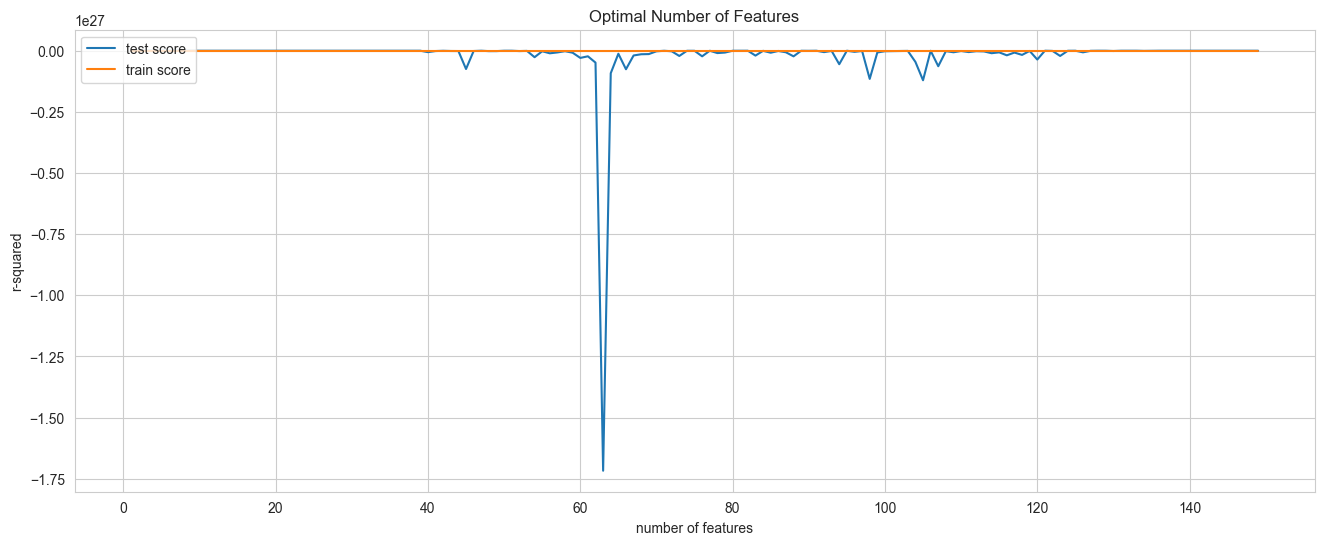

In [129]:
# plot
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [130]:
# esquema de cross-validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Rango de hyperparametro (n° de features)
hyper_params = [{'n_features_to_select': list(range(1, 100))}]

# definir modelo
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

model_cv_2 = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv_2.fit(X_train, y_train)   

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [131]:
cv_error_results = pd.DataFrame(model_cv_2.cv_results_)
cv_error_results["mean_test_score"]= np.sqrt(-cv_error_results["mean_test_score"])
cv_error_results["mean_train_score"]= np.sqrt(-cv_error_results["mean_train_score"])

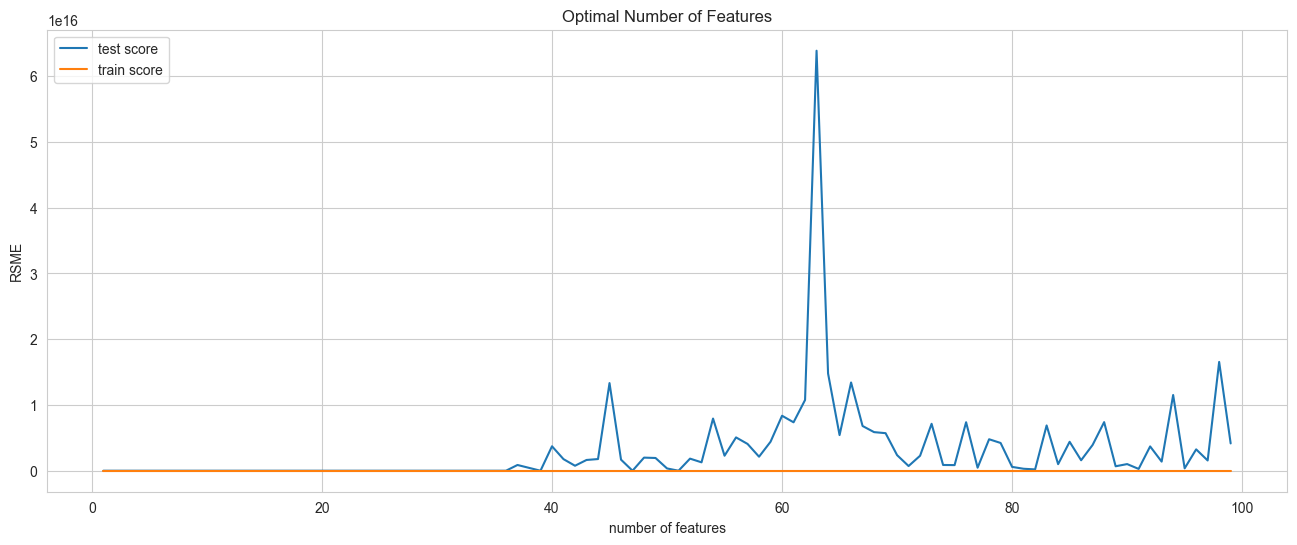

In [132]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_error_results["param_n_features_to_select"], cv_error_results["mean_test_score"])
plt.plot(cv_error_results["param_n_features_to_select"], cv_error_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('RSME')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

<b> A partir de las 40 features, el error del test set aumenta mucho--> indica overfitting </b> <h5> Hay que reducir el número de features!!!!</h5> 

##### Uso RFE para ver cuales son los 10 features más importantes.

In [133]:
lm = LinearRegression()
selector = RFE(lm, n_features_to_select=50)

In [134]:
selector = selector.fit(X_train, y_train)
support= selector.support_

In [135]:
X_train.columns[support] #ESTOS SON LOS 50 FEATURES MÁS IMPORTANTES.

Index(['country_Andorra', 'country_Australia', 'country_Austria',
       'country_Belgium', 'country_Bhutan', 'country_Canada', 'country_China',
       'country_Croatia', 'country_Cyprus', 'country_Czech Republic',
       'country_Denmark', 'country_Fiji', 'country_Finland', 'country_France',
       'country_Germany', 'country_Greece', 'country_Guyana',
       'country_Ireland', 'country_Isle Of Man', 'country_Israel',
       'country_Italy', 'country_Japan', 'country_Kenya', 'country_Malta',
       'country_Montenegro', 'country_Netherlands', 'country_New Zealand',
       'country_Nigeria', 'country_Norway', 'country_Panama', 'country_Peru',
       'country_Philippines', 'country_Poland', 'country_Portugal',
       'country_Rwanda', 'country_San Marino', 'country_Sint Maarten',
       'country_Slovakia', 'country_Slovenia', 'country_South Korea',
       'country_Spain', 'country_Sweden', 'country_Taiwan', 'country_Tanzania',
       'country_Thailand', 'country_Trinidad And Tobago',
  

In [136]:
X_train_10features = X_train.loc[:,support]
X_test_10features = X_test.loc[:,support]

#### Regresión lineal usando Cross-validation: Usando los 10 features más importantes

In [137]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(lin_reg, X_train_10features, y_train, scoring='r2', cv=folds)
print('R2 para train:', round(scores.mean(),3))

R2 para train: -1.483680392225237e+24


In [138]:
scores_Test = cross_val_score(lin_reg, X_test_10features, y_test, scoring='r2', cv=folds)
print('R2 para test:', round(scores_Test.mean(),3))

R2 para test: -6.2706906134214e+26


In [139]:
scores_MSE = cross_val_score(lin_reg, X_train_10features, y_train, scoring='neg_mean_squared_error', cv=5)
lin_rmse_scores = np.sqrt(-scores_MSE)
print('RMSE para train:', round(lin_rmse_scores.mean(),1))

RMSE para train: 1597520171106133.2


In [140]:
scores_MSE = cross_val_score(lin_reg, X_test_10features, y_test, scoring='neg_mean_squared_error', cv=5)
lin_rmse_scores = np.sqrt(-scores_MSE)
print('RMSE para test:', round(lin_rmse_scores.mean(),1))

RMSE para test: 5.071792764092364e+16


#### Regularización Ridge 

GridSearch para encontrar el mejor alpha

In [141]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[1,5,7.5, 10]}

# defino modelo
model = Ridge()
# defino GridSearch
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#ajusto a mis datos
Ridge_reg.fit(X_train, y_train)

# best estimator
print(Ridge_reg.best_estimator_)

Ridge(alpha=5)


In [142]:
ridge_reg = Ridge(alpha=5, solver="cholesky")
ridge_reg.fit(X_train, y_train)

Ridge(alpha=5, solver='cholesky')

In [143]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_ridge = cross_val_score(ridge_reg, X_train, y_train, scoring='r2', cv=folds)
print('R2 para train:', round(scores_ridge.mean(),3))

R2 para train: 0.569


In [144]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_ridge_test = cross_val_score(ridge_reg, X_test, y_test, scoring='r2', cv=folds)
print('R2 para test:', round(scores_ridge_test.mean(),3))

R2 para test: 0.557


In [145]:
ridge_mse_scores = cross_val_score(ridge_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
ridge_rmse_scores = np.sqrt(-ridge_mse_scores)
print('RMSE para train:', round(ridge_rmse_scores.mean(),1))

RMSE para train: 995.3


In [146]:
ridge_mse_scorestest = cross_val_score(ridge_reg, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
ridge_rmse_scorestest = np.sqrt(-ridge_mse_scorestest)
print('RMSE para test:', round(ridge_rmse_scorestest.mean(),1))

RMSE para test: 1019.7


VEO EL VALOR PREDICHO PARA EL METRO CUADRADO EN 10 CIUDADES AL AZAR:

In [174]:
some_cities= list(X_train.sample(n=10, random_state=20).index)
some_data = X_train.sample(n=10, random_state=20)
some_prices = y_train.sample(n=10, random_state=20)
Predictions= pd.Series(ridge_reg.predict(some_data), name= "Predictions")
Real_prices= pd.Series(list(some_prices), name= "Real Prices")

In [175]:
subset_predictions= pd.DataFrame(pd.concat([Predictions, Real_prices],axis=1))
subset_predictions.set_index(pd.Series(data.iloc[some_cities,0]),inplace=True)
subset_predictions 

,Predictions,Real Prices
city,,
Florianopolis,2406.803693,2366.44
Iskenderun,4420.768438,3161.24
Mar del Plata,3348.080508,4642.25
Chiayi,3726.882685,4302.39
Tunis,1310.006281,1097.83
Omsk,3177.742917,1345.49
Bialystok,3605.154309,4501.80
Pocheon,4457.086547,5866.33
Kirov,1139.484307,1133.36
